# Clasificación binaria

### Importaciones

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Lectura de la información [URL origen](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

#### Montar Google Drive

In [ ]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/Colab Notebooks/CursoDL/datasets/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

Mounted at /content/gdrive


#### Lectura de los datos

In [ ]:
# dataset: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
dataframe = read_csv(DIRECTORIO + "sonar.csv", header=None)


### Preparación de los datos

*Aleatoriza y convierte a array de numpy*

In [ ]:
dataframe = dataframe.sample(frac = 1) # orden aleatorio (frac=1 -> 100% del dataset)
dataset = dataframe.values  # numpy.ndarray
print(dataset.shape)

(208, 61)


*Divide el dataset entre las variables de entrada (X) y salida (Y), y convierte entradas a float*

In [ ]:
X = dataset[:,0:60].astype(float)    # X e Y son ndarrays 
Y = dataset[:,60]  # R:roca , M:metal

*Codifica como enteros los valores de las clases de la salida: codificación categórica*

<img src="https://miro.medium.com/max/386/1*Yp6r7m82IoSnnZDPpDpYNw.png" width="300"/>

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
print (encoder.classes_)  # muestra ['M' 'R']
print (encoder.inverse_transform([0,1])) # muestra ['M' 'R']

['M' 'R']
['M' 'R']


### Crea el modelo

In [ ]:
modelo = Sequential()
modelo.add(Dense(60, input_dim=60, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

### Compila y entrena el modelo

In [ ]:
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historial = modelo.fit(X, encoded_Y, validation_split=0.2, epochs=200, verbose=0)

### Muestra evolución de las pérdidas y la precisión

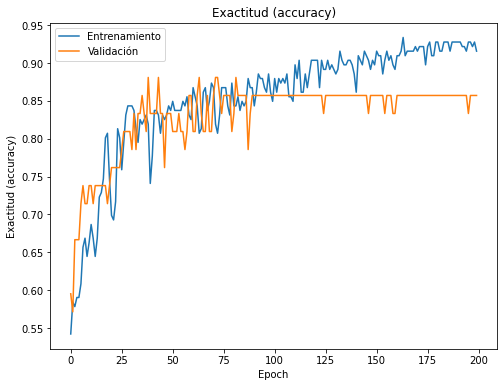

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.title('Exactitud (accuracy)')
plt.ylabel('Exactitud (accuracy)') 
plt.xlabel('Epoch');